In [1]:
import pandas as pd
import random
import sys
sys.path.append('/home/climaco/Aptamers/src')
import time
from APTamers import  Aptamer_Fold
from utils import create_batches
from tqdm import tqdm
from collections import Counter
import numpy as np
from forgi.graph.bulge_graph import BulgeGraph
from sklearn import preprocessing

In [4]:
# Specify the path to your CSV file
csv_file_path = '/home/climaco/Aptamers/data/SRTN.csv'
pcsv_file_path = '/home/climaco/Aptamers/data/pSRTN.csv'

multiply  = 50
df =  pd.concat([create_batches(csv_file_path, multiply), create_batches(pcsv_file_path, multiply)], ignore_index=False)
df = df.drop_duplicates(subset=['sequence'])
df = df.reset_index(drop=True)

In [5]:
print(df.head())
print('Total computed structures is ', len(df))

      name                                           sequence  times
0  SRTN01​  gggacgacAACCCTGATAACTACATCCGTGTTATCTCGGAATGTgt...      1
1  SRTN02​  gggacgacGACCTTGTTGAACATGAATGGTGAAACTCAGCATGCgt...      1
2  SRTN03​  gggacgacGACCCTGATTGTGGTATAGTCATAATCTCGGAATGCgt...      1
3  SRTN04​  gggacgacTGGTAGGCAGCAGGGGAAGAGACTTGGTGTCTCGTGGg...      1
4  SRTN08​  gggacgacTCAGCATGCTCATTAACGAACGTATAATGAGACCTTgt...      1
Total computed structures is  1264


In [6]:
#folding function
def fold_structure( strn):
    structures_DB = []
    structures = []
    APT = Aptamer_Fold(l_fix = 4)
    APT.fit_fold( sequence=strn,  n_tmpl=4, l_fix=8 , filters = False)
    count_bonds  = []
    for st in APT.structures_DB:
        count_bonds.append(Counter(st)['('])   
        max_bonds = np.max(count_bonds)
    for i, st in enumerate( APT.structures_DB):
        if count_bonds[i] >=  max_bonds :
          structures_DB.append(APT.structures_DB[i])
          structures.append(APT.structures[i])
    return structures_DB, structures

structures_DB = []
structures = []
descriptors = []
start = time.time()
for i in tqdm(range(len(df['sequence']))):
    #computing structures
    stra  = fold_structure( df['sequence'][i])
    structures_DB.append(stra[0])
    structures.append(stra[1])
    '''
    #Computing descripots from structures
    bg = BulgeGraph.from_dotbracket( stra[0][0], df['sequence'][i])
    element_string =  bg.to_element_string()
    descriptor = np.zeros(3)
    for count, e in enumerate(['s', 'i', 'h']):
        descriptor[count] = Counter(element_string)[e]
        if e == 's':
            descriptor[count] /=2
    descriptors.append(descriptor)
    '''
print(time.time()- start) 
    


100%|██████████| 1264/1264 [00:26<00:00, 47.83it/s]

26.434534072875977


In [30]:
arrays_descriptor = np.asarray(descriptors)
normalized_descriptors = preprocessing.StandardScaler().fit_transform(arrays_descriptor)

D = np.zeros((len(structures), len(structures)))

for i in range(len(structures)):
    for j in range(i+1, len(structures)):
        D[i,j]= np.linalg.norm(normalized_descriptors[i] - normalized_descriptors[j])
        D[j,i] = D[i,j]



In [31]:
from sklearn.cluster import SpectralClustering
import numpy as np

def perform_spectral_clustering(distance_matrix, num_clusters):
    # Create a SpectralClustering object
    spectral_clustering = SpectralClustering(n_clusters=num_clusters, affinity='precomputed', random_state=42)
    # Perform clustering
    spct = spectral_clustering.fit(distance_matrix)
    labels =  spct.labels_
    return labels

num_clusters = 2# Number of clusters

# Perform spectral clustering
cluster_labels = perform_spectral_clustering(D, num_clusters)

/local/hdd/climaco/anaconda3/envs/aptamer_graph/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:427: UserWarning: Exited at iteration 42 with accuracies 
[2.01239141e-15 2.23320824e-05 1.73728695e-05]
not reaching the requested tolerance 1.8835067749023438e-05.
Use iteration 42 instead with accuracy 
1.323498395261138e-05.

  _, diffusion_map = lobpcg(
/local/hdd/climaco/anaconda3/envs/aptamer_graph/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:427: UserWarning: Exited postprocessing with accuracies 
[2.04076960e-15 2.23320824e-05 1.73728695e-05]
not reaching the requested tolerance 1.8835067749023438e-05.
  _, diffusion_map = lobpcg(


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

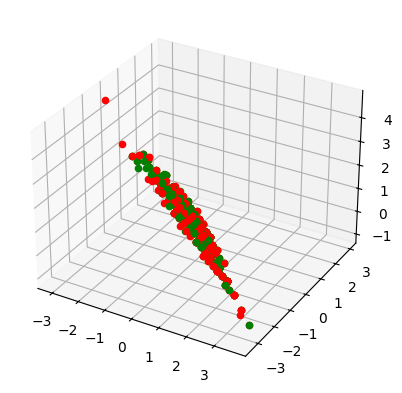

In [33]:
label_colors = {0: 'r', 1: 'g', 2: 'b', 3:'y'}

# Visualize the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for array_3d, label in zip(normalized_descriptors, cluster_labels):
    color = label_colors[label]
    ax.scatter(array_3d[0], array_3d[ 1], array_3d[2], c=color, label=label)



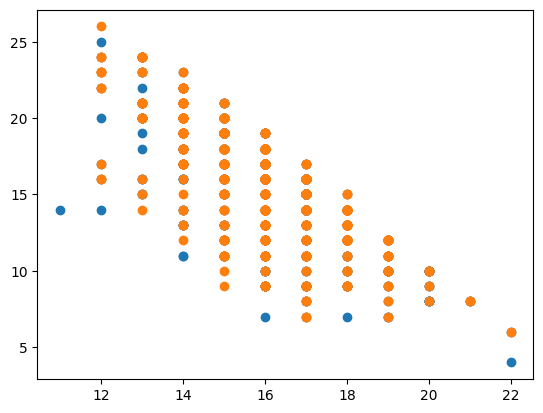

In [40]:
plt.scatter(arrays_descriptor[cluster_labels== 0,0], arrays_descriptor[cluster_labels==0,1])
plt.scatter(arrays_descriptor[cluster_labels== 1,0], arrays_descriptor[cluster_labels==1,1])

Maximal amount of bonds in structure is 19
Number of computed structures is 1


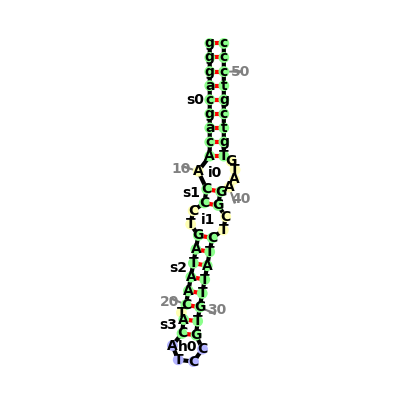

Maximal amount of bonds in structure is 16
Number of computed structures is 1


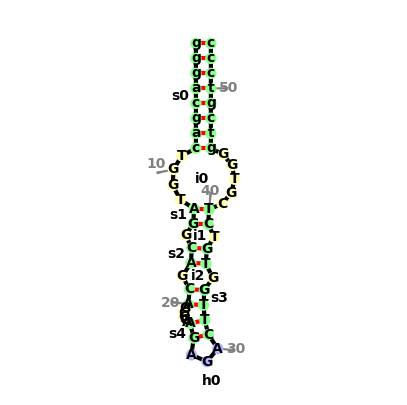

Maximal amount of bonds in structure is 19
Number of computed structures is 1


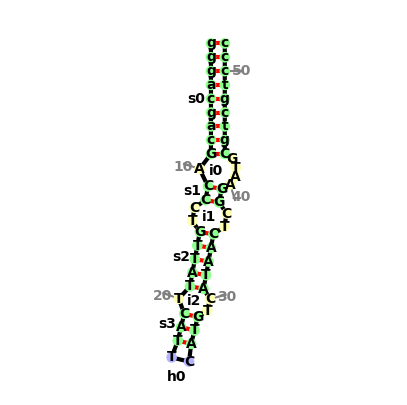

Maximal amount of bonds in structure is 13
Number of computed structures is 1


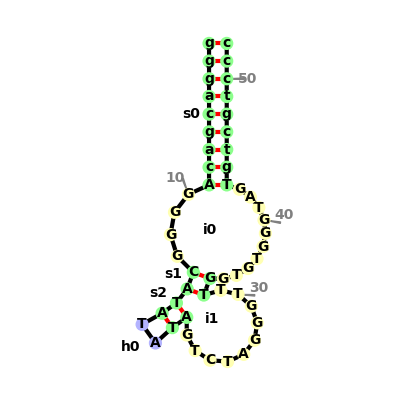

Maximal amount of bonds in structure is 15
Number of computed structures is 1


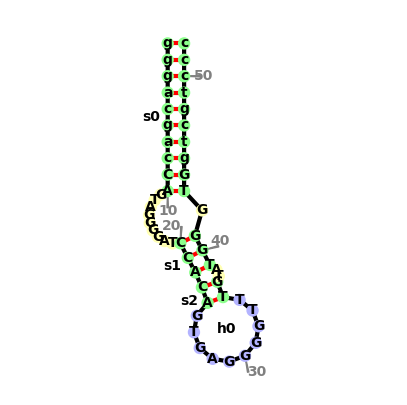

Maximal amount of bonds in structure is 17
Number of computed structures is 1


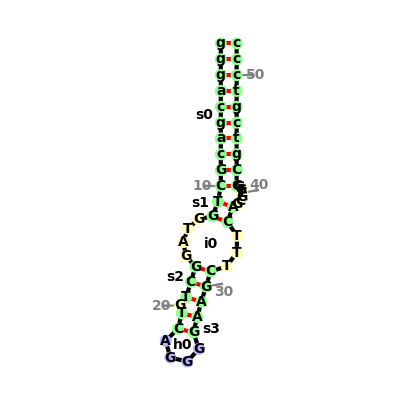

Maximal amount of bonds in structure is 16
Number of computed structures is 1


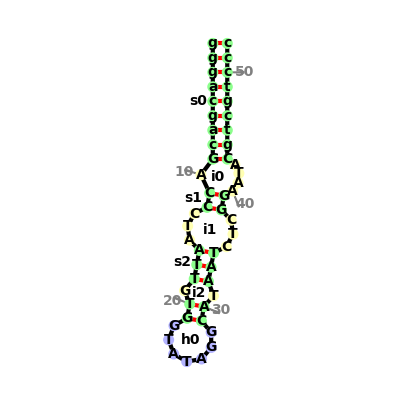

Maximal amount of bonds in structure is 15
Number of computed structures is 1


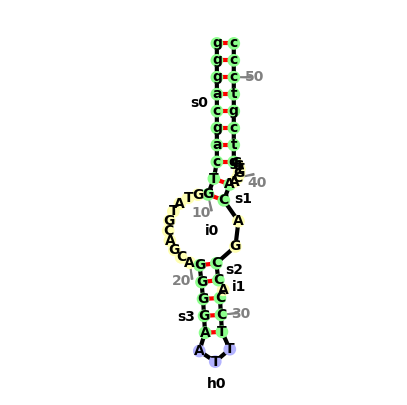

Maximal amount of bonds in structure is 15
Number of computed structures is 1


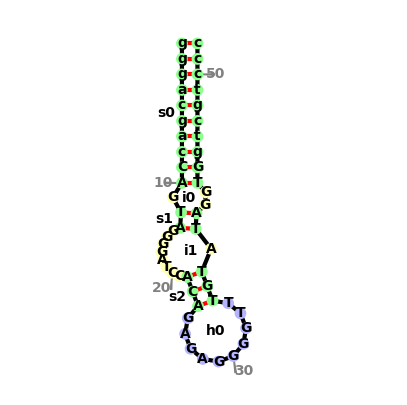

Maximal amount of bonds in structure is 16
Number of computed structures is 1


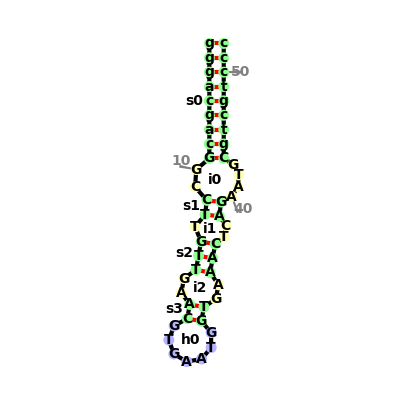

Maximal amount of bonds in structure is 18
Number of computed structures is 1


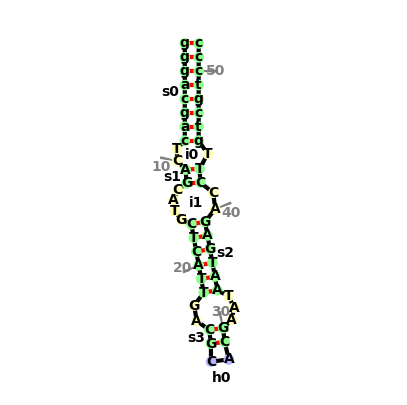

Maximal amount of bonds in structure is 16
Number of computed structures is 1


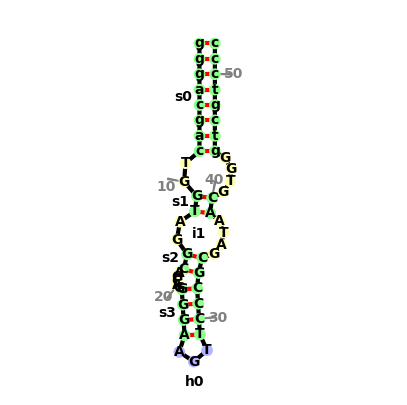

Maximal amount of bonds in structure is 18
Number of computed structures is 1


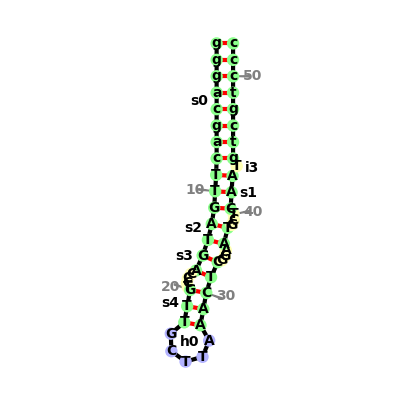

Maximal amount of bonds in structure is 15
Number of computed structures is 1


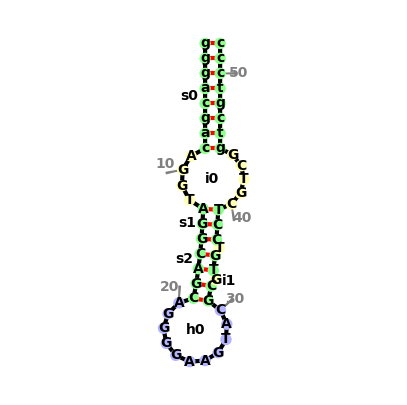

Maximal amount of bonds in structure is 17
Number of computed structures is 1


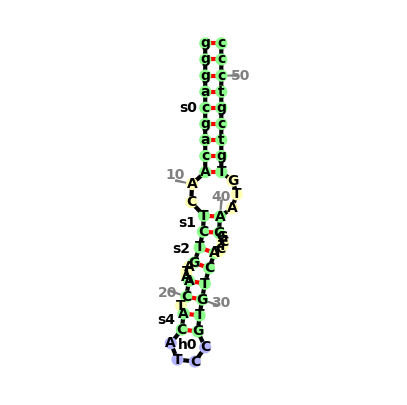

Maximal amount of bonds in structure is 18
Number of computed structures is 1


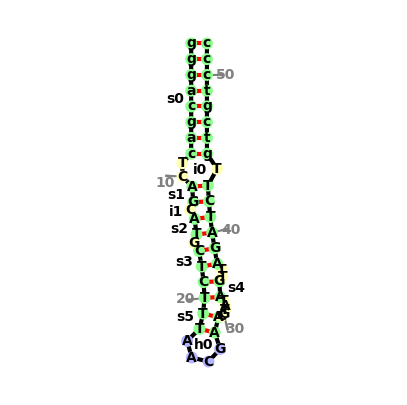

Maximal amount of bonds in structure is 15
Number of computed structures is 1


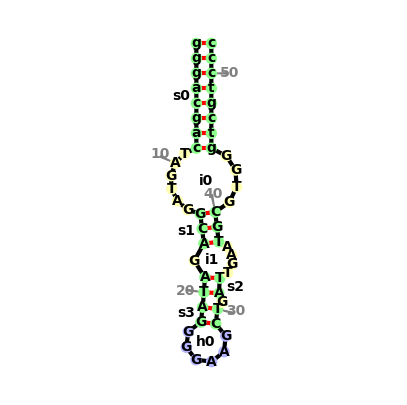

Maximal amount of bonds in structure is 16
Number of computed structures is 1


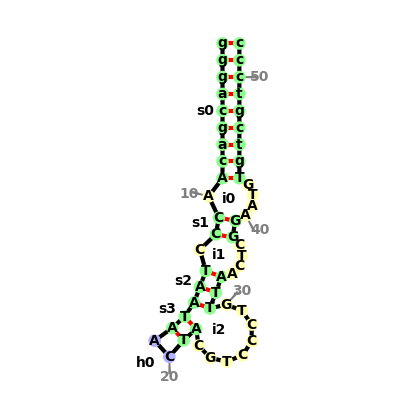

Maximal amount of bonds in structure is 19
Number of computed structures is 1


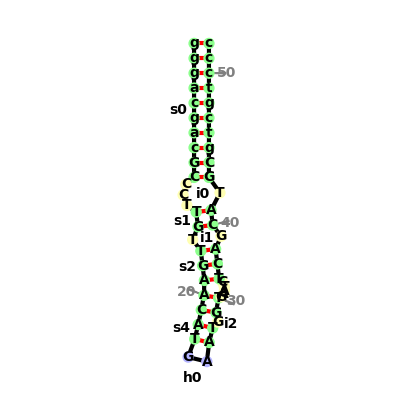

Maximal amount of bonds in structure is 19
Number of computed structures is 1


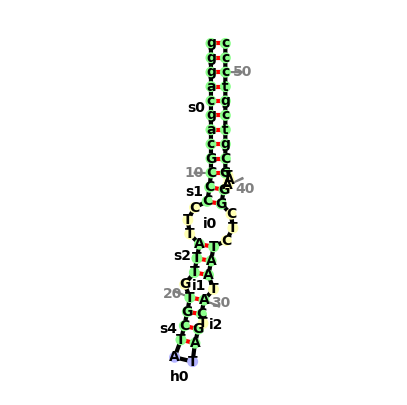

Maximal amount of bonds in structure is 17
Number of computed structures is 1


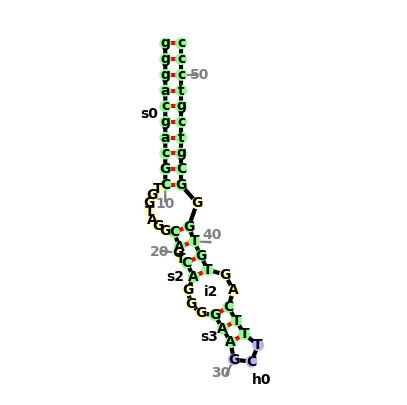

Maximal amount of bonds in structure is 19
Number of computed structures is 1


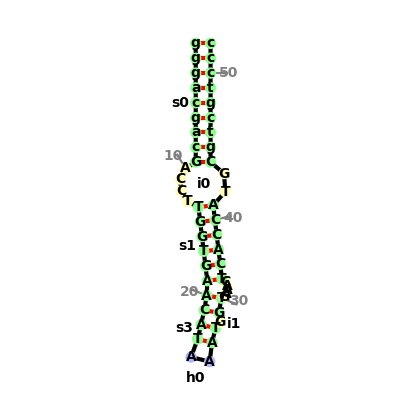

Maximal amount of bonds in structure is 15
Number of computed structures is 1


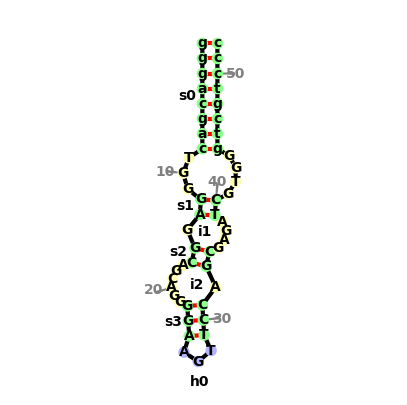

Maximal amount of bonds in structure is 18
Number of computed structures is 1


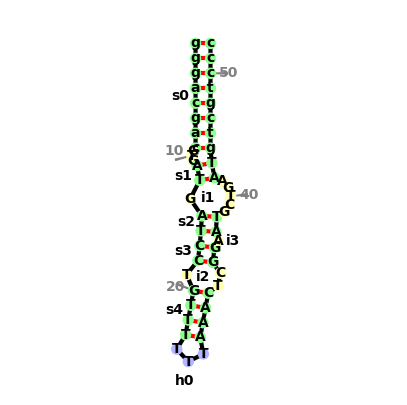

Maximal amount of bonds in structure is 15
Number of computed structures is 1


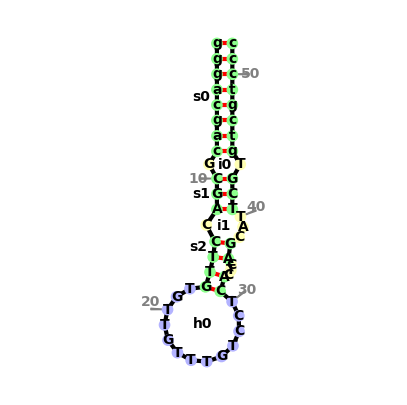

Maximal amount of bonds in structure is 22
Number of computed structures is 1


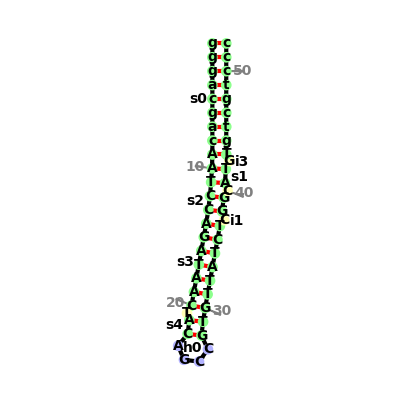

Maximal amount of bonds in structure is 18
Number of computed structures is 1


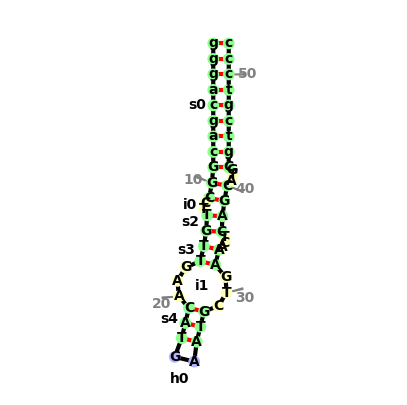

Maximal amount of bonds in structure is 17
Number of computed structures is 1


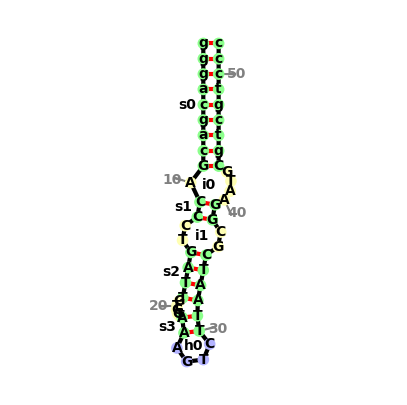

Maximal amount of bonds in structure is 21
Number of computed structures is 1


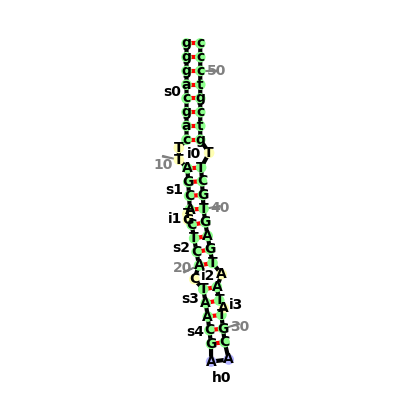

Maximal amount of bonds in structure is 17
Number of computed structures is 1


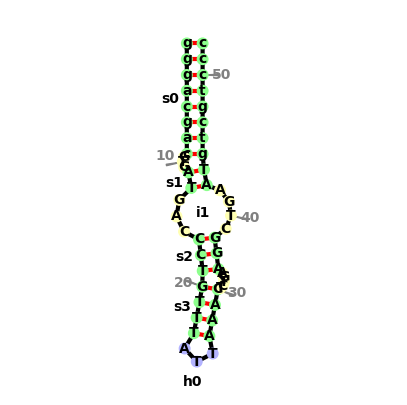

Maximal amount of bonds in structure is 15
Number of computed structures is 1


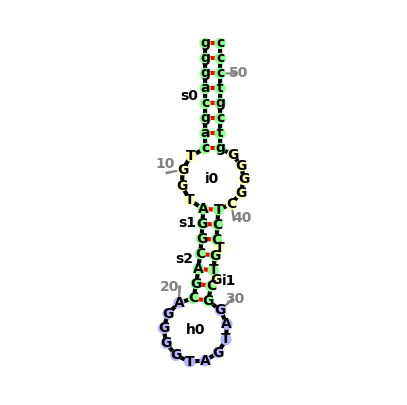

Maximal amount of bonds in structure is 16
Number of computed structures is 1


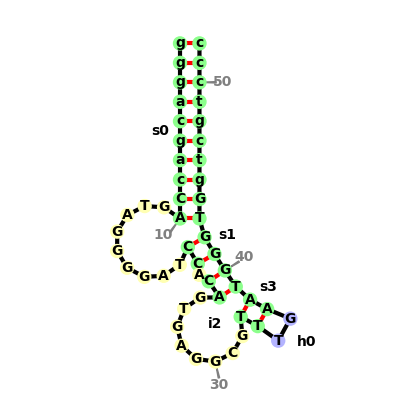

Maximal amount of bonds in structure is 16
Number of computed structures is 1


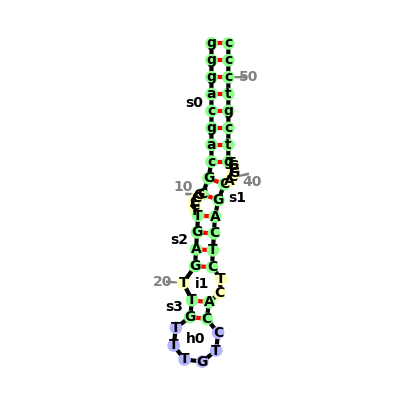

Maximal amount of bonds in structure is 17
Number of computed structures is 1


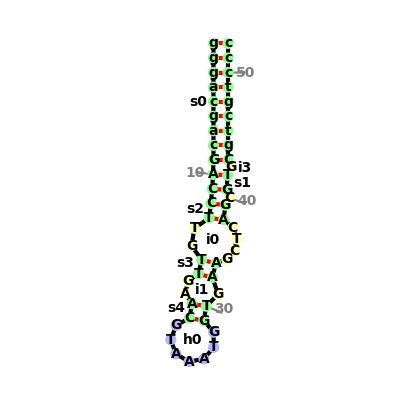

Maximal amount of bonds in structure is 18
Number of computed structures is 1


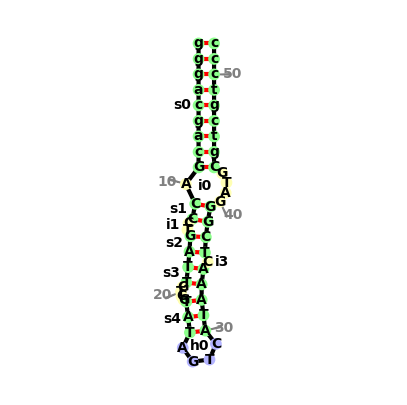

Maximal amount of bonds in structure is 14
Number of computed structures is 1


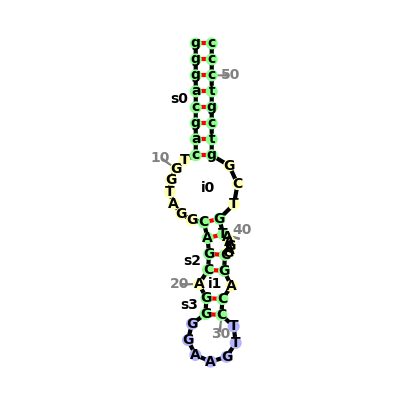

Maximal amount of bonds in structure is 17
Number of computed structures is 1


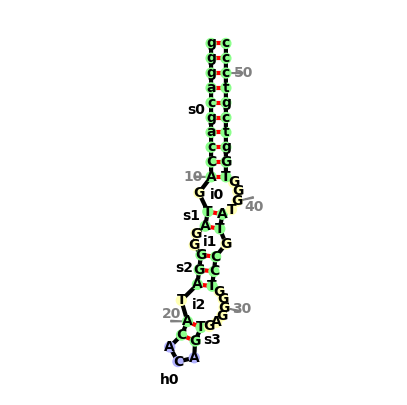

Maximal amount of bonds in structure is 18
Number of computed structures is 1


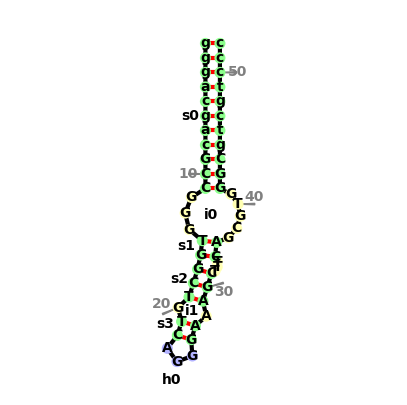

Maximal amount of bonds in structure is 17
Number of computed structures is 1


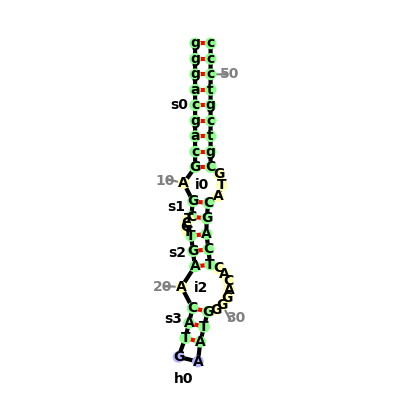

Maximal amount of bonds in structure is 18
Number of computed structures is 1


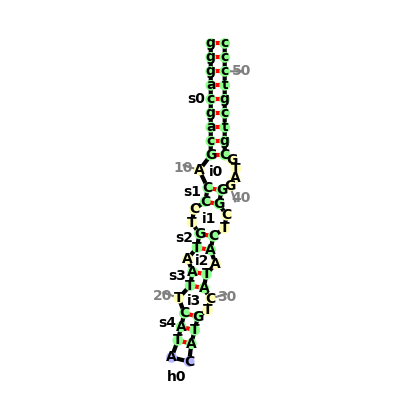

Maximal amount of bonds in structure is 16
Number of computed structures is 1


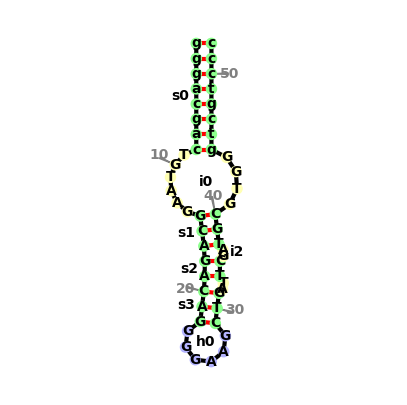

Maximal amount of bonds in structure is 18
Number of computed structures is 1


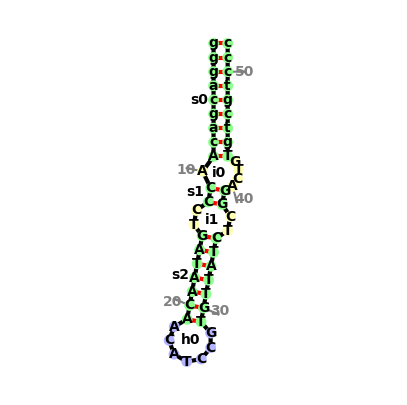

Maximal amount of bonds in structure is 17
Number of computed structures is 1


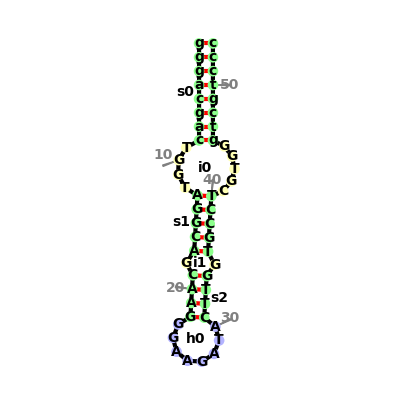

Maximal amount of bonds in structure is 16
Number of computed structures is 1


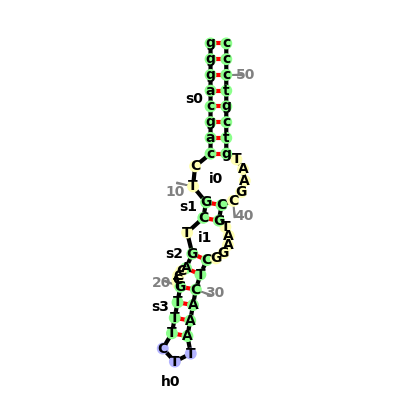

Maximal amount of bonds in structure is 16
Number of computed structures is 1


In [12]:
for i in range(len(cluster_labels)):
    if cluster_labels[i]== 1:
        
        APT = Aptamer_Fold(sequence = df['sequence'][i], structures_DB = [structures_DB[i][0]])
        APT.plot_structures()

In [ ]:


def remove_spaces_and_convert_to_upper(input_string, remove_first = 5):
    #input_string = input_string.upper()
    input_string = input_string.replace(" ", "")
    return input_string[remove_first:]


def substitute_random_chars(input_string, d = 4 , l= 8):
    
    '''
    d is the number of nucleotides we want to swap in  the string
    
    l i s the nuber of intial/final nucleatides that are fixed
    
    '''
    
    if len(input_string) <= 2:  # If string length is less than or equal to 2, cannot perform substitution
        return input_string

    # Number of elements to exclude from the start and end
    length = len(input_string)
    if length <= 2 * l:  # If string length is too small to perform substitution
        return input_string

    # Selecting characters between the first l and last l elements
    substr_start = l
    substr_end = length - l-1
    substr = input_string[substr_start:substr_end]

    # Randomly selecting d characters to substitute
    substitute_indices = random.sample(range(len(substr)), min(d, len(substr)))

    # Substituting selected characters with random characters from set (A, C, T, G)
    substitution_set = ['A', 'C', 'T', 'G']
    substr_list = list(substr)
    for index in substitute_indices:
        substr_list[index] = random.choice(substitution_set)

    # Reconstructing the string with substitutions
    output_string = input_string[:substr_start] + ''.join(substr_list) + input_string[substr_end:]
    return output_string


def change_name( input_sequence, seed ):
    
    return input_sequence + f'_seed_{seed}'

def create_batches(csv_file_path, times):
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file_path)
    df['sequence']= df['sequence'].apply(remove_spaces_and_convert_to_upper)
    sd = df

    for i in range( times ):
        random.seed(i)
        cd = df.copy()
        cd['sequence']= cd['sequence'].apply(substitute_random_chars)
        cd['name'] = cd['name'].apply(change_name, args=(i,))
        cd['times'] = 0
        sd = pd.concat([sd, cd], ignore_index=True)
    
    return sd.drop_duplicates(subset=['sequence'])